In [1]:
import os
import sys
from itertools import product
import numpy as np
np.set_printoptions(precision=4,suppress=True, linewidth=140)
import scipy

import matplotlib.pyplot as plt

from h5 import HDFArchive
from triqs.gf import *
from triqs.gf.descriptors import Fourier, Omega
from triqs.plot.mpl_interface import plt,oplot
from triqs.lattice.utils import TB_from_wannier90, k_space_path

import solid_dmft.postprocessing.plot_correlated_bands as pcb
import solid_dmft.postprocessing.maxent_sigma as sigma_maxent

Starting serial run at: 2024-04-02 11:07:38.816477


In [2]:
Sigma_real_freq = sigma_maxent.main(external_path='./fese.h5',
                                    omega_min=-20, omega_max=20,
                                    maxent_error=0.02, iteration=9,
                                    n_points_maxent=201,
                                    n_points_alpha=60,
                                    analyzer='LineFitAnalyzer',
                                    n_points_interp=3001,
                                    n_points_final=2001,
                                    continuator_type='inversion_dc')[0][0]

Finished reading h5 archive. Found 1 impurities.
Created sigma continuator of type "inversion_dc"
Starting run of maxent now.
Continuing impurities with blocks:
- Imp 0: ['up_0', 'up_1', 'up_2', 'up_3', 'up_4', 'down_0', 'down_1', 'down_2', 'down_3', 'down_4']
appending
appending
appending
appending
appending
appending
appending
appending
appending
appending
Optimal alphas, block (0, 'up_0'):
--- Real part ---
[[37]]
Optimal alphas, block (0, 'up_1'):
--- Real part ---
[[38]]
Optimal alphas, block (0, 'up_2'):
--- Real part ---
[[41]]
Optimal alphas, block (0, 'up_3'):
--- Real part ---
[[41]]
Optimal alphas, block (0, 'up_4'):
--- Real part ---
[[42]]
Optimal alphas, block (0, 'down_0'):
--- Real part ---
[[37]]
Optimal alphas, block (0, 'down_1'):
--- Real part ---
[[38]]
Optimal alphas, block (0, 'down_2'):
--- Real part ---
[[41]]
Optimal alphas, block (0, 'down_3'):
--- Real part ---
[[41]]
Optimal alphas, block (0, 'down_4'):
--- Real part ---
[[42]]
Extracting Σ(ω) now with 1 pr

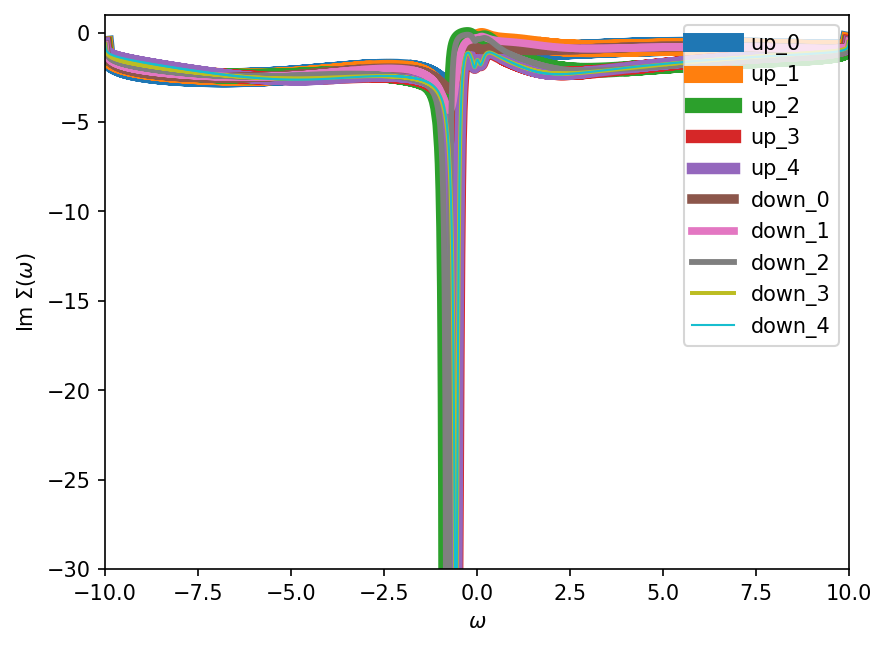

In [35]:
fig, ax = plt.subplots(1, dpi=150)
color = ['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9']
n=-1
a=10
for block, Sw in Sigma_real_freq:
    a=a-0.9
    n=n+1
    ax.oplot((Sw - Sw(0.0).real)[0,0].imag ,'-', c=color[n], label=block,linewidth=a)
ax.set_ylabel(r"Im $\Sigma (\omega)$")
ax.set_xlim(-10,10)
ax.set_ylim(-30,1)
plt.show()

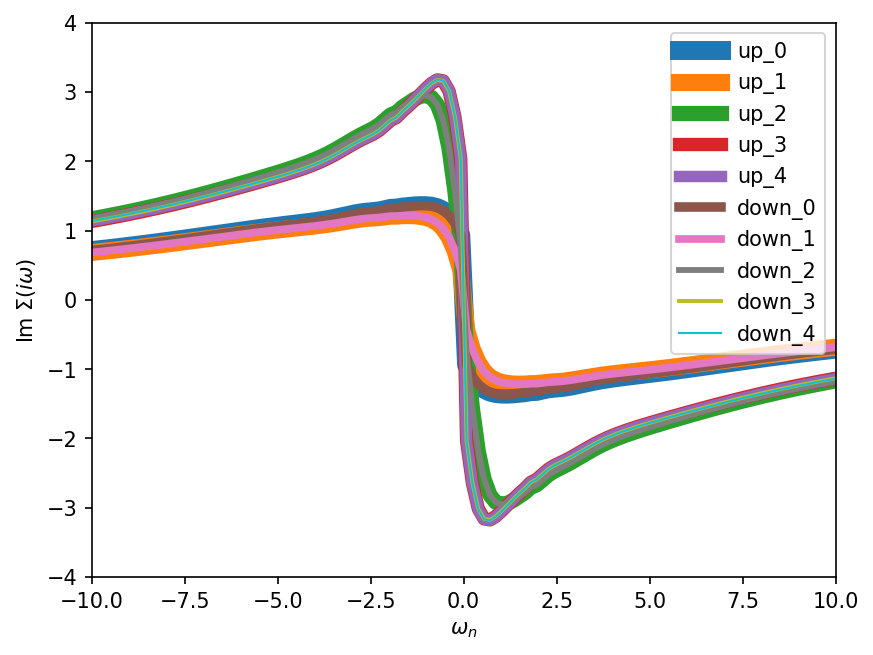

In [34]:
with HDFArchive('./fese.h5','r') as h5:
    Sigma_imp_iw = h5['DMFT_results/last_iter/Sigma_freq_0']
fig, ax = plt.subplots(1, dpi=150)
color = ['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9']
n=-1
a=10
for block, Sw in Sigma_imp_iw:
    a=a-0.9
    n=n+1
    ax.oplot(Sw.imag ,'-', c=color[n], label=block,linewidth=a)
ax.set_ylabel(r"Im $\Sigma (i\omega)$")
ax.set_xlim(-10,10)
ax.set_ylim(-4,4)
plt.show()
